In [1]:
import vision_models
from vision_models.visualizations import show_conv1

models

<module 'models' from '/home/jovyan/work/GitHub/visionlab_models/models/__init__.py'>

In [2]:
models.list_families()

['alexnet_pytorch']

In [3]:
models.list_models('alexnet_pytorch')

['alexnet_7be5be79']

In [4]:
models.show_metadata('alexnet_pytorch', 'alexnet_7be5be79')

{'arch': 'alexnet_pytorch',
 'hashid': '7be5be79',
 'weights_url': 'https://download.pytorch.org/models/alexnet-owt-7be5be79.pth',
 'description': 'Alexnet(PyTorch) Trained on ImageNet1k Classification',
 'num_classes': 1000,
 'input_size': (3, 224, 224),
 'crop_pct': 0.875,
 'resize': (256, 256),
 'input_range': [0, 1],
 'mean': [0.485, 0.456, 0.406],
 'std': [0.229, 0.224, 0.225],
 'interpolation': <InterpolationMode.BILINEAR: 'bilinear'>,
 'repo': 'https://github.com/pytorch/vision',
 'task': 'supervised1k',
 'dataset': 'imagenet-1k',
 'datasize': '1.3M',
 'bib': '"\\"\\""',
 'model_family': 'alexnet_pytorch',
 'model_name': 'alexnet_7be5be79'}

In [5]:
model, transform = models.load_model('alexnet_pytorch', 'alexnet_7be5be79')
model

/home/jovyan/.local/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/jovyan/.local/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


==> alexnet_pytorch-supervised1k-imagenet1k-7be5be79, loading checkpoint: https://download.pytorch.org/models/alexnet-owt-7be5be79.pth
==> state loaded: <All keys matched successfully>


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

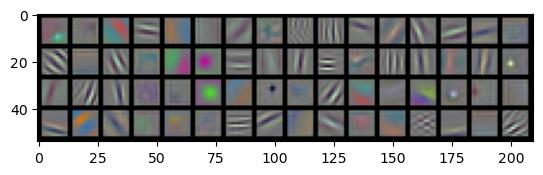

In [6]:
show_conv1(model)

In [7]:
transform

{'val_transforms': Compose(
     OpenImage()
     Resize(size=256, interpolation=bilinear, max_size=None, antialias=warn)
     CenterCrop(size=(224, 224))
     ToTensor()
     Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
 ),
 'test_transforms': Compose(
     OpenImage()
     Resize(size=224, interpolation=bilinear, max_size=None, antialias=warn)
     CenterCrop(size=(224, 224))
     ToTensor()
     Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
 ),
 'to_pil': Compose(
     InverseNormalize(mean=tensor([0.4850, 0.4560, 0.4060]), std=tensor([0.2290, 0.2240, 0.2250]))
     ToPILImage()
 )}

In [8]:
url = 'https://www.dropbox.com/s/n8nr36vox86t25u/example.png?dl=1'
img = transform['test_transforms'](url)
img.shape

torch.Size([3, 224, 224])

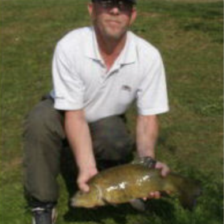

In [9]:
transform['to_pil'](img)

In [16]:
model.relu_layers = [ln for ln,lt in zip(model.layer_names,model.layer_types) if lt=='ReLU']

In [18]:
layer_names = model.relu_layers + ['classifier.6']
layer_names

['features.1',
 'features.4',
 'features.7',
 'features.9',
 'features.11',
 'classifier.2',
 'classifier.5',
 'classifier.6']

In [25]:
import torch

model.eval()
with torch.no_grad():
    batch = img.unsqueeze(0)
    feat = model.get_features(batch, layer_names=layer_names)
for k,v in feat.items(): print(k, v.shape)

features.1 torch.Size([1, 64, 55, 55])
features.4 torch.Size([1, 192, 27, 27])
features.7 torch.Size([1, 384, 13, 13])
features.9 torch.Size([1, 256, 13, 13])
features.11 torch.Size([1, 256, 13, 13])
classifier.2 torch.Size([1, 4096])
classifier.5 torch.Size([1, 4096])
classifier.6 torch.Size([1, 1000])


In [26]:
feat['classifier.6'].argmax()

tensor(0)